### Stimulus Generator
This program intends to generate stimuli in the experiment1, which analyzes the interaction between parsibility and age. There are two conditions. The experimental condition contains stimuli with complicated arrangement and the control condition contains stimuli with the same set of primitive shapes listed in grids.

In [34]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon, Rectangle, Arc
import matplotlib as mpl
import random
import os


#### Directory and file hierarchy

In [35]:
exp_dir = os.getcwd()
stm_dir = os.path.join(exp_dir, 'stimulus')

#### Initiate variables

In [37]:
# canvas
img_side = 512  # image size is (img_size, img_size)
half_side = int(img_side / 2) # half of the image side
orig = (0,0)

# shapes
num_of_pairs = 1 # the total number of stimuli pairs
max_snum, min_snum = 3, 6 # the range of possible numbers of primitives in each composite shape
max_scale,min_scale = 1.2, 0.8
max_rotation, min_rotation = 360, 0
max_move, min_move = int(half_side/4), -int(half_side/4)
default_width = half_side * 0.8
default_height = half_side * 0.8
lw = 3

#### Generate stimuli 

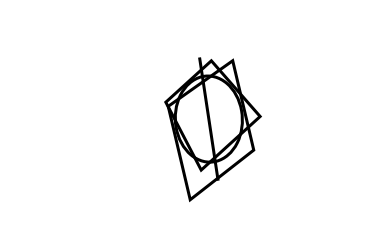

In [38]:
for p in range(num_of_pairs):
    snum = random.randint(max_snum, min_snum)
    fig = plt.figure()

    all_shape = [] # a list that contains all shape paths

    for i in range(snum):
        # randomly select a shape and its scaling, rotation, and translation parameters
        shape = random.randint(1,6)
        width, height = int(default_width * random.uniform(min_scale, max_scale)), int(default_height * random.uniform(min_scale, max_scale))
        rotation = random.randint(min_rotation, max_rotation)
        tx, ty = random.randint(min_move, max_move), random.randint(min_move, max_move)
        half_scalex, half_scaley = int(width / 2), int(height / 2)

        if shape == 1:
            shape_path = Ellipse(orig, width, height, fill=False, lw=lw)

        elif shape == 2:
            upper_left = (int(orig[0]-default_width/2), int(orig[1]-default_height/2))
            shape_path = Rectangle(upper_left, width, height, fill=False, lw=lw)

        elif shape == 3: # triangle
            half_scalex, half_scaley = int(width/2), int(height/2)
            p1, p2 = (orig[0]- half_scalex, orig[1]+ half_scaley), (orig[0]+half_scalex, orig[1]+half_scaley)
            p3 = (orig[0] + random.randint(0, width),orig[1]-half_scalex)
            shape_path = Polygon([p1, p2, p3], fill=False, lw=lw)

        elif shape == 4: #line
            p1, p2 = (orig[0] - half_scalex, orig[1]-half_scaley), (orig[0] + half_scalex, orig[1] + half_scaley)
            shape_path = Polygon([p1, p2], fill=False, lw=lw)

        elif shape == 5: # trapezoid
            half_width2 = int(default_width * random.uniform(min_scale, max_scale)/2)
            move = random.randint(min_move, max_move)
            p1, p2 = (orig[0] - half_scalex, orig[1] + half_scaley), (orig[0] + half_scalex, orig[1] + half_scaley)
            p3, p4 = (orig[0] + move+ half_width2, orig[1] - half_scalex), (orig[0] + move -half_width2, orig[1] - half_scalex)
            shape_path = Polygon([p1, p2, p3, p4], fill=False, lw=lw)

        elif shape == 6:
            degree = random.randint(60, 270)
            shape_path = Arc(orig, width, height, theta1=0, theta2=degree, fill=False, lw=lw)

        all_shape.append({'shape': shape_path, 'rotation':rotation, 'tx':tx, 'ty':ty})


    # create the stimulus in the experimental condition

    ax = plt.subplot(111)
    ax.axis('off')
    ax.set_xlim(-half_side, half_side)
    ax.set_ylim(-half_side, half_side)

    for item in all_shape:
        transform = mpl.transforms.Affine2D().rotate_deg(item['rotation']).translate(item['tx'], item['ty']) + ax.transData
        item['shape'].set_transform(transform)
        ax.add_patch(item['shape'])

    fig.savefig(os.path.join(stm_dir, 'exp_{:03}'.format(p + 1)))


    # create the stimulus in the control condition

    img_width = (snum + 1) / 2 * half_side
    ax.set_xlim(-img_width, img_width)
    ax.set_ylim(-half_side, half_side)

    for index, item in enumerate(all_shape):
        transform = mpl.transforms.Affine2D().translate(item['tx'], item['ty']) + ax.transData  
        item['shape'].set_transform(transform)

    fig.savefig(os.path.join(stm_dir, 'control_{:03}'.format(p + 1)))
